In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (16, 8)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
seed(1)

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.head()

,date,variable,value
0,2004-01-01 00:00:00,area_1,16.853
1,2004-01-01 01:00:00,area_1,16.450
2,2004-01-01 02:00:00,area_1,16.517
3,2004-01-01 03:00:00,area_1,16.873
4,2004-01-01 04:00:00,area_1,17.064


In [4]:
data.shape

(51480, 3)

In [5]:
data = pd.DataFrame(data)

In [6]:
data.date = pd.to_datetime(data.date, infer_datetime_format=True )

In [7]:
data = data.set_index(['date'])
data = data.sort_index()

In [8]:
data.head()

,variable,value
date,,
2004-01-01 00:00:00,area_1,16.853
2004-01-01 00:00:00,area_2,126.259
2004-01-01 00:00:00,area_3,79.830
2004-01-01 01:00:00,area_1,16.450
2004-01-01 01:00:00,area_2,123.313


In [9]:
data = data.dropna()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
area_1 = data[data.variable == 'area_1'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')
area_2 = data[data.variable == 'area_2'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')
area_3 = data[data.variable == 'area_3'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')


area_1 = area_1.resample("h").mean()
area_2 = area_2.resample("h").mean()
area_3 = area_3.resample("h").mean()

area_1 = area_1.fillna(area_1.mean())
area_2 = area_2.fillna(area_2.mean())
area_3 = area_3.fillna(area_3.mean())





In [12]:
decomposition_a1 = seasonal_decompose(area_1.value, model='multiplicative')
decomposition_a2 = seasonal_decompose(area_2.value, model='multiplicative')
decomposition_a3 = seasonal_decompose(area_3.value, model='multiplicative')

In [13]:
decomposition_a1.trend.head(10)

date
2004-01-01 00:00:00   NaN
2004-01-01 01:00:00   NaN
2004-01-01 02:00:00   NaN
2004-01-01 03:00:00   NaN
2004-01-01 04:00:00   NaN
2004-01-01 05:00:00   NaN
2004-01-01 06:00:00   NaN
2004-01-01 07:00:00   NaN
2004-01-01 08:00:00   NaN
2004-01-01 09:00:00   NaN
Freq: H, Name: value, dtype: float64

In [14]:
decomposition_a1.seasonal.head(10)

date
2004-01-01 00:00:00    0.837341
2004-01-01 01:00:00    0.805809
2004-01-01 02:00:00    0.797417
2004-01-01 03:00:00    0.801034
2004-01-01 04:00:00    0.828156
2004-01-01 05:00:00    0.907920
2004-01-01 06:00:00    1.038615
2004-01-01 07:00:00    1.093020
2004-01-01 08:00:00    1.071755
2004-01-01 09:00:00    1.048644
Freq: H, Name: value, dtype: float64

In [15]:
decomposition_a2.trend.head(10)

date
2004-01-01 00:00:00   NaN
2004-01-01 01:00:00   NaN
2004-01-01 02:00:00   NaN
2004-01-01 03:00:00   NaN
2004-01-01 04:00:00   NaN
2004-01-01 05:00:00   NaN
2004-01-01 06:00:00   NaN
2004-01-01 07:00:00   NaN
2004-01-01 08:00:00   NaN
2004-01-01 09:00:00   NaN
Freq: H, Name: value, dtype: float64

In [16]:
decomposition_a2.seasonal.head(10)

date
2004-01-01 00:00:00    0.851340
2004-01-01 01:00:00    0.826197
2004-01-01 02:00:00    0.813295
2004-01-01 03:00:00    0.812372
2004-01-01 04:00:00    0.830487
2004-01-01 05:00:00    0.880808
2004-01-01 06:00:00    0.964668
2004-01-01 07:00:00    1.024895
2004-01-01 08:00:00    1.043070
2004-01-01 09:00:00    1.057816
Freq: H, Name: value, dtype: float64

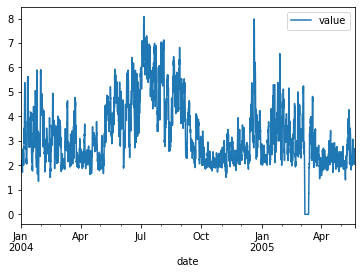

In [17]:
area_1.rolling(30).std().plot()

In [18]:
decomposition_a2 = seasonal_decompose(area_2.value, model='multiplicative')

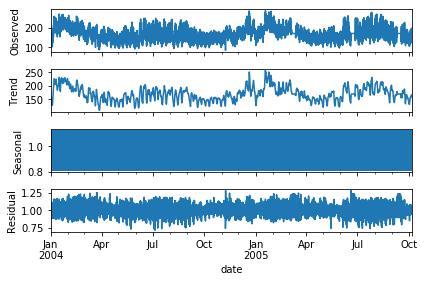

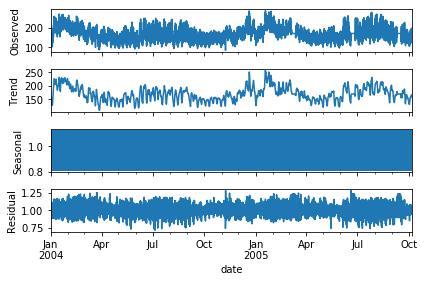

In [19]:
decomposition_a2.plot()

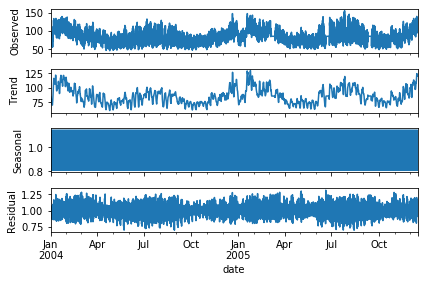

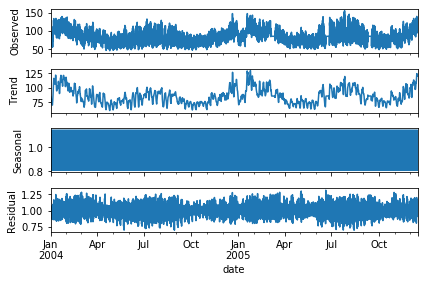

In [20]:
decomposition_a3.plot()


In [21]:
decomposition_a3 = seasonal_decompose(area_3, model='additive')

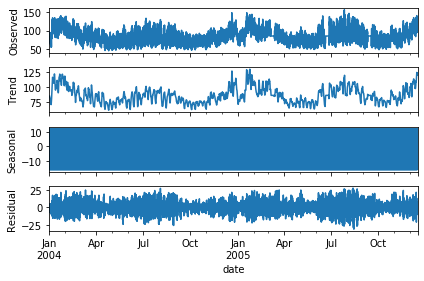

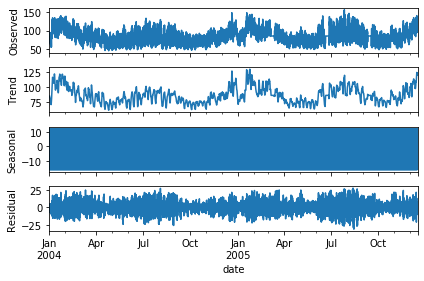

In [22]:
decomposition_a3.plot()

In [23]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Text(0, 0.5, 'Autocorrelation')

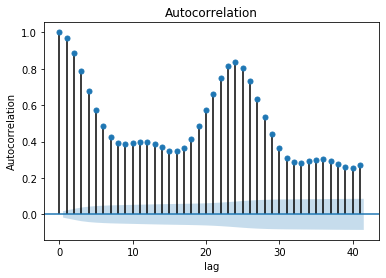

In [24]:
plot_acf(area_1, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')


Text(0, 0.5, 'Autocorrelation')

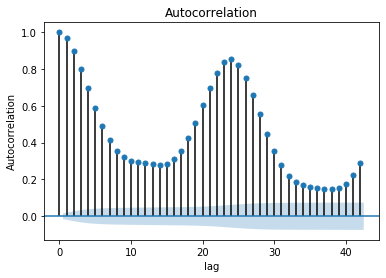

In [25]:
plot_acf(area_2, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

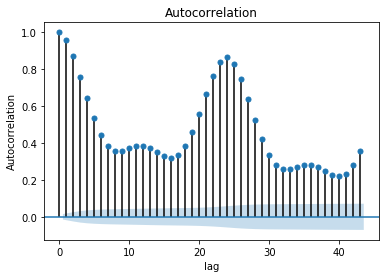

In [26]:
plot_acf(area_3, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

In [27]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

Text(0, 0.5, 'Autocorrelation')

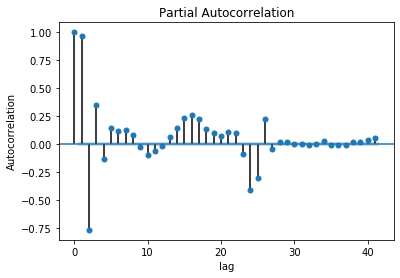

In [28]:
plot_pacf(area_1, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

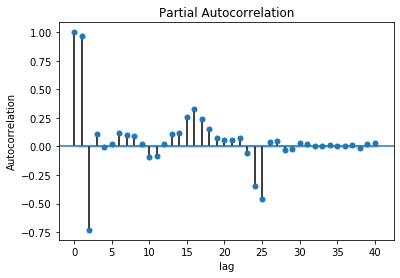

In [29]:
plot_pacf(area_2, alpha=.05, lags = 40)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

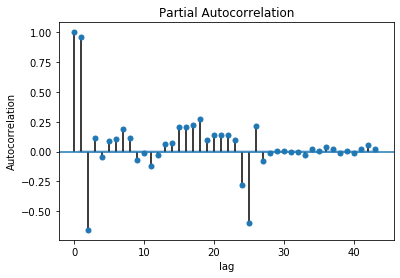

In [30]:
plot_pacf(area_3, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

In [31]:
area_1.pct_change().head(10)

,value
date,
2004-01-01 00:00:00,NaN
2004-01-01 01:00:00,-0.023913
2004-01-01 02:00:00,0.004073
2004-01-01 03:00:00,0.021554
2004-01-01 04:00:00,0.011320
2004-01-01 05:00:00,0.038854
2004-01-01 06:00:00,0.047780
2004-01-01 07:00:00,0.042048
2004-01-01 08:00:00,0.009248


In [32]:
changes_3 = area_3.loc['2004'].pct_change()
corr_chan3 = changes_3

In [33]:
area_2.loc['2004'].pct_change().head()

,value
date,
2004-01-01 00:00:00,NaN
2004-01-01 01:00:00,-0.023333
2004-01-01 02:00:00,-0.033419
2004-01-01 03:00:00,-0.014137
2004-01-01 04:00:00,0.007114


In [34]:
area_1.loc['2004'].pct_change().head()

,value
date,
2004-01-01 00:00:00,NaN
2004-01-01 01:00:00,-0.023913
2004-01-01 02:00:00,0.004073
2004-01-01 03:00:00,0.021554
2004-01-01 04:00:00,0.011320


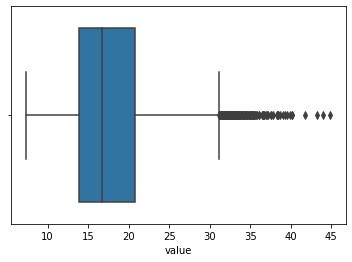

In [36]:
import seaborn as sns
sns.boxplot(area_1['value'])

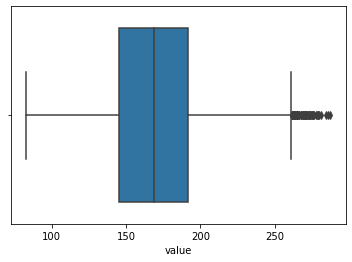

In [37]:
sns.boxplot(area_2['value'])

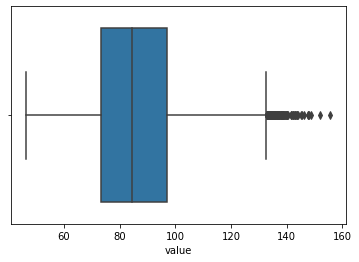

In [38]:
sns.boxplot(area_3['value'])

In [39]:
daily_diff_1 = area_1.diff()
daily_diff_2  = area_2.diff()
daily_diff_3  = area_3.diff()
daily_diff_1.head(30)

,value
date,
2004-01-01 00:00:00,NaN
2004-01-01 01:00:00,-0.403
2004-01-01 02:00:00,0.067
2004-01-01 03:00:00,0.356
2004-01-01 04:00:00,0.191
2004-01-01 05:00:00,0.663
2004-01-01 06:00:00,0.847
2004-01-01 07:00:00,0.781
2004-01-01 08:00:00,0.179


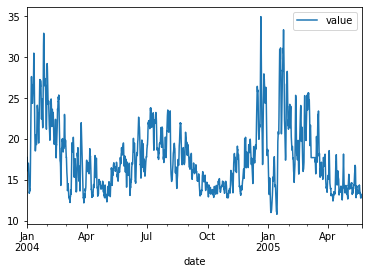

In [40]:
moving_avg_per_hour1 = area_1.rolling(24, min_periods=0).mean().plot()

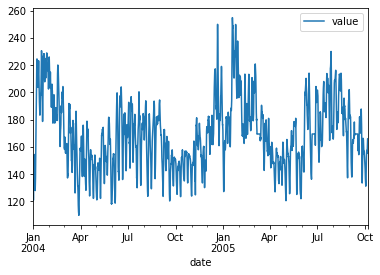

In [41]:
moving_avg_per_hour2 = area_2.rolling(24, min_periods=0).mean().plot()

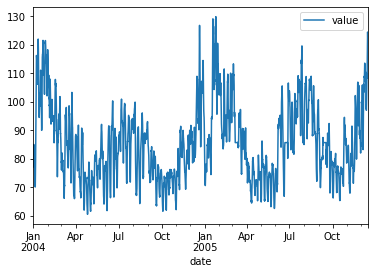

In [42]:
moving_avg_per_hour3 = area_3.rolling(24, min_periods=0).mean().plot()

In [43]:
moving_avg_per_hour2

In [44]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

In [45]:
area_1_day = area_1.index.to_period('W')
area_1.head()

,value
date,
2004-01-01 00:00:00,16.853
2004-01-01 01:00:00,16.450
2004-01-01 02:00:00,16.517
2004-01-01 03:00:00,16.873
2004-01-01 04:00:00,17.064


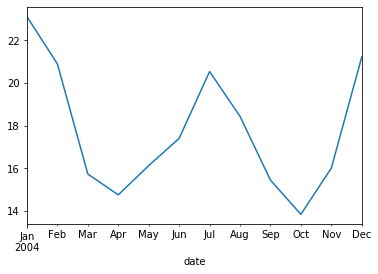

In [46]:
area_1.loc['2004']['value'].resample('M').mean().plot()

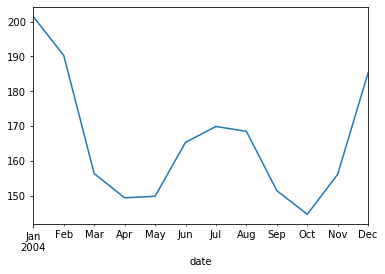

In [47]:
area_2.loc['2004']['value'].resample('M').mean().plot()

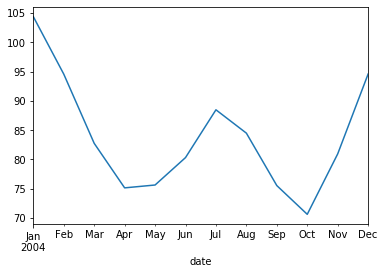

In [48]:
area_3.loc['2004']['value'].resample('M').mean().plot()

In [49]:
area_1_daily = area_1.loc['2004']['value'].resample('D').mean()
area_2_daily = area_2.loc['2004']['value'].resample('D').mean()
area_3_daily = area_3.loc['2004']['value'].resample('D').mean()




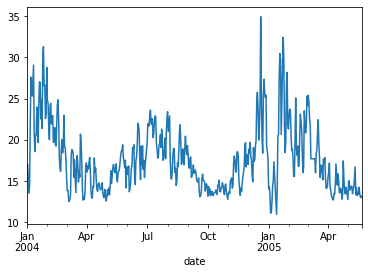

In [50]:
area_1['value'].resample('D').mean().plot()

In [51]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

train_2 = train_2.reset_index()
test_2 = test_2.reset_index()


In [52]:
for i in (train_2, test_2):
    i['year']= i['date'].dt.year 
    i['month']=i['date'].dt.month 
    i['day']=i['date'].dt.day
    i['Hour']=i['date'].dt.hour 

In [53]:
train_2.head()

,date,value,year,month,day,Hour
0,2004-01-01 00:00:00,126.259,2004,1,1,0
1,2004-01-01 01:00:00,123.313,2004,1,1,1
2,2004-01-01 02:00:00,119.192,2004,1,1,2
3,2004-01-01 03:00:00,117.507,2004,1,1,3
4,2004-01-01 04:00:00,118.343,2004,1,1,4


In [54]:
train_2['day of week']=train_2['date'].dt.dayofweek 
temp = train_2['date']

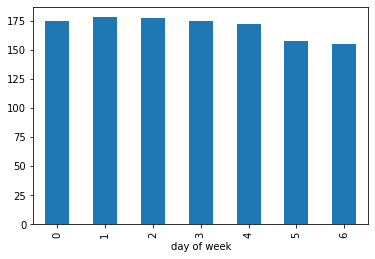

In [63]:
train_2.groupby('day of week')['value'].mean().plot.bar()

In [56]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train_2['date'].apply(applyer) 
train_2['weekend']=temp2

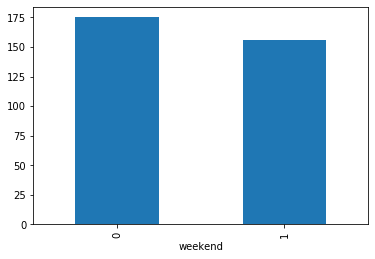

In [57]:
train_2.groupby('weekend')['value'].mean().plot.bar()

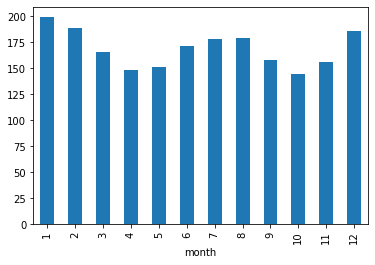

In [58]:
train_2.groupby('month')['value'].mean().plot.bar()

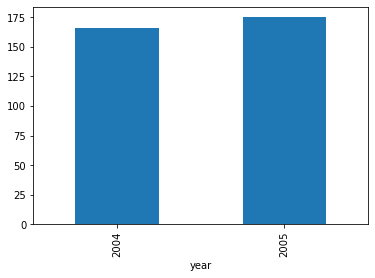

In [59]:
train_2.groupby('year')['value'].mean().plot.bar()

In [60]:
train_2 = train_2.reset_index()
test_2 = test_2.reset_index()

In [61]:
train_2['pct_change'] = train_2.pct_change()

TypeError: cannot perform __truediv__ with this index type: DatetimeIndex